In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import Data_sets

In [24]:

sydney_df = pd.read_csv("Data_sets\Sydney_data.csv")
sydney_df.columns = [f'X{i+1}' for i in range(16)] + [f'Y{i+1}' for i in range(16)] + [f'P{i+1}' for i in range(16)] + ['Power_all']

sydney_new_df = pd.DataFrame()

for i in range(1, 17):
    sydney_new_df[f'P{i}'] = sydney_df[f'P{i}']
sydney_new_df['Power_all'] = sydney_df['Power_all']

sydney_df.head()


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\48663\AppData\Local\Temp\ipykernel_15668\2608712373.py:1: SyntaxWarning: invalid escape sequence '\S'
  sydney_df = pd.read_csv("Data_sets\Sydney_data.csv")


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
0,500.4677,278.6497,47.4062,417.3653,551.7083,401.1797,0.0000,161.7773,368.1543,45.9850,...,83029.8436,91483.7433,93748.1139,99467.6415,95935.6597,84254.7876,93786.3095,94499.4790,88941.7152,1489888.502
1,511.7510,104.4383,566.0000,380.4079,345.8587,0.0000,90.5588,7.2899,566.0000,566.0000,...,91309.1752,107598.5159,101897.2685,100876.0477,79350.0981,100060.2964,92733.9494,100646.9126,83394.8729,1495035.934
2,19.6990,216.4378,355.2960,67.8151,518.7256,72.1572,222.7933,223.9242,566.0000,312.4474,...,92083.6042,103182.5412,80688.8463,92306.4190,106440.6778,102118.7041,99295.1266,96503.3818,77942.2947,1459841.498
3,0.0000,0.0000,243.3420,0.0000,566.0000,0.0000,198.4878,0.0000,566.0000,566.0000,...,85602.1738,98370.5585,97148.3728,95775.0777,80723.5930,95865.7812,88525.7698,94546.5417,85021.1027,1475765.923
4,446.6611,421.0366,493.1895,566.0000,516.3773,566.0000,566.0000,474.8170,566.0000,0.0000,...,89796.6317,106234.3463,86528.7448,97221.3296,80957.7402,95689.2702,95590.0073,85799.2132,88227.3054,1486388.580


In [25]:
sydney_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
count,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,...,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,7.199900e+04
mean,324.133374,318.477362,248.652631,273.801529,364.119683,270.716619,268.092122,251.208070,257.471430,263.834583,...,92460.884080,92400.975646,92359.920807,93528.646327,92532.953265,92866.755979,94515.600559,92124.749321,92812.610497,1.486229e+06
std,201.042089,200.451621,207.727700,202.495956,165.251348,221.883331,210.126467,191.411037,193.920646,203.081690,...,6351.798805,7314.158973,6617.069863,7108.760851,6631.067652,7179.122445,6828.225439,6978.018276,7128.182893,2.308365e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,67649.721100,67935.571500,67961.501700,67930.722800,68171.326100,68113.928900,68294.961800,66233.342800,64609.768500,1.361962e+06
25%,137.455000,131.145850,43.281500,63.622900,248.586900,38.901650,57.463400,79.830000,71.289250,48.943750,...,87871.385400,86957.379300,87504.869750,88247.377750,87321.966400,87602.912550,90045.083400,86835.587700,87872.906700,1.470987e+06
50%,355.491700,355.171500,201.883500,274.830100,388.361200,250.374600,233.010400,213.817000,239.241300,265.394800,...,92484.468800,91374.359800,92113.541800,93441.473900,93066.785000,91552.374600,94274.492400,91202.941700,91453.286100,1.487282e+06
75%,524.002100,518.243450,462.505600,468.287000,515.557000,511.209300,485.903150,422.632000,432.784500,457.985850,...,97638.110300,97719.256750,97502.161300,98653.938950,97534.290600,98739.756650,99668.769550,97512.504000,98362.924200,1.504180e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,110026.753900,109417.620000,109240.703000,109668.448700,109185.088800,109898.206000,109237.388800,109087.161400,109253.606800,1.536347e+06


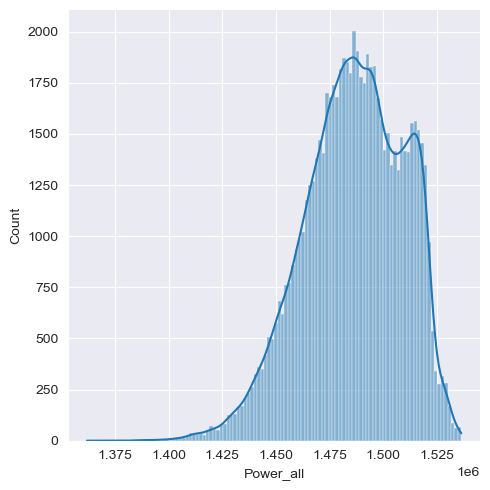

In [26]:
sns.displot(sydney_df['Power_all'], kde=True)


In [27]:
# Usunięcie wszystkich kolumn Pi (P1 do P16)
columns_to_remove = [f"P{i}" for i in range(1, 17)]
sydney_new_df = sydney_df.drop(columns=columns_to_remove, errors='ignore')

sydney_df = sydney_new_df
print("Kolumny po usunięciu P1-P16:", sydney_df.columns)

sydney_df.head(10)

Kolumny po usunięciu P1-P16: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6',
       'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16',
       'Power_all'],
      dtype='object')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Power_all
0,500.4677,278.6497,47.4062,417.3653,551.7083,401.1797,0.0000,161.7773,368.1543,45.9850,...,566.0000,566.0000,258.2014,376.2201,477.4717,412.2800,96.7684,90.1294,364.7503,1489888.502
1,511.7510,104.4383,566.0000,380.4079,345.8587,0.0000,90.5588,7.2899,566.0000,566.0000,...,246.4883,0.0000,208.0817,60.8637,566.0000,48.4488,117.4450,411.2962,566.0000,1495035.934
2,19.6990,216.4378,355.2960,67.8151,518.7256,72.1572,222.7933,223.9242,566.0000,312.4474,...,351.0215,354.9378,566.0000,391.7332,99.2301,0.0000,137.3001,535.2882,566.0000,1459841.498
3,0.0000,0.0000,243.3420,0.0000,566.0000,0.0000,198.4878,0.0000,566.0000,566.0000,...,53.6411,546.4076,253.0758,0.0000,53.9287,396.4652,0.0000,0.0000,10.9969,1475765.923
4,446.6611,421.0366,493.1895,566.0000,516.3773,566.0000,566.0000,474.8170,566.0000,0.0000,...,433.9819,0.0000,481.3123,0.0000,566.0000,0.0000,6.0358,566.0000,465.4973,1486388.580
5,398.0662,0.0000,172.9500,480.6902,566.0000,566.0000,257.4459,67.4326,5.4764,566.0000,...,540.0883,349.5919,213.1047,0.0000,0.0000,566.0000,566.0000,503.7899,116.7250,1483891.978
6,113.7286,341.2415,418.0059,0.0000,566.0000,566.0000,566.0000,0.0000,0.0000,566.0000,...,566.0000,287.7841,566.0000,334.3373,54.4844,0.0000,206.8418,396.7980,566.0000,1502682.470
7,0.0000,0.0000,0.0000,557.9507,0.0000,566.0000,530.5327,566.0000,461.6140,495.1422,...,566.0000,566.0000,420.6266,566.0000,566.0000,58.6311,255.0382,0.0000,566.0000,1477945.897
8,369.2071,304.0515,566.0000,164.3125,552.6091,557.8421,437.3143,395.9587,417.7882,0.0000,...,566.0000,484.8547,0.0000,566.0000,566.0000,566.0000,0.0000,362.2357,269.9263,1476718.888
9,39.8478,231.8411,176.4778,0.0000,566.0000,0.0000,566.0000,202.1302,566.0000,291.1011,...,0.0000,566.0000,529.3260,136.8710,502.9318,117.4366,130.5829,168.2698,376.7318,1504052.297


In [28]:
has_nan = sydney_df.isnull().values.any()
print(" NaN:", has_nan)

 NaN: False


In [29]:
sydney_df= sydney_df.dropna()
sydney_df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
71994    False
71995    False
71996    False
71997    False
71998    False
Length: 71999, dtype: bool

In [30]:
# Sprawdzenie liczby wartości NaN w każdej kolumnie
nan_counts = sydney_df.isnull().sum()

print(nan_counts)


X1           0
X2           0
X3           0
X4           0
X5           0
X6           0
X7           0
X8           0
X9           0
X10          0
X11          0
X12          0
X13          0
X14          0
X15          0
X16          0
Y1           0
Y2           0
Y3           0
Y4           0
Y5           0
Y6           0
Y7           0
Y8           0
Y9           0
Y10          0
Y11          0
Y12          0
Y13          0
Y14          0
Y15          0
Y16          0
Power_all    0
dtype: int64


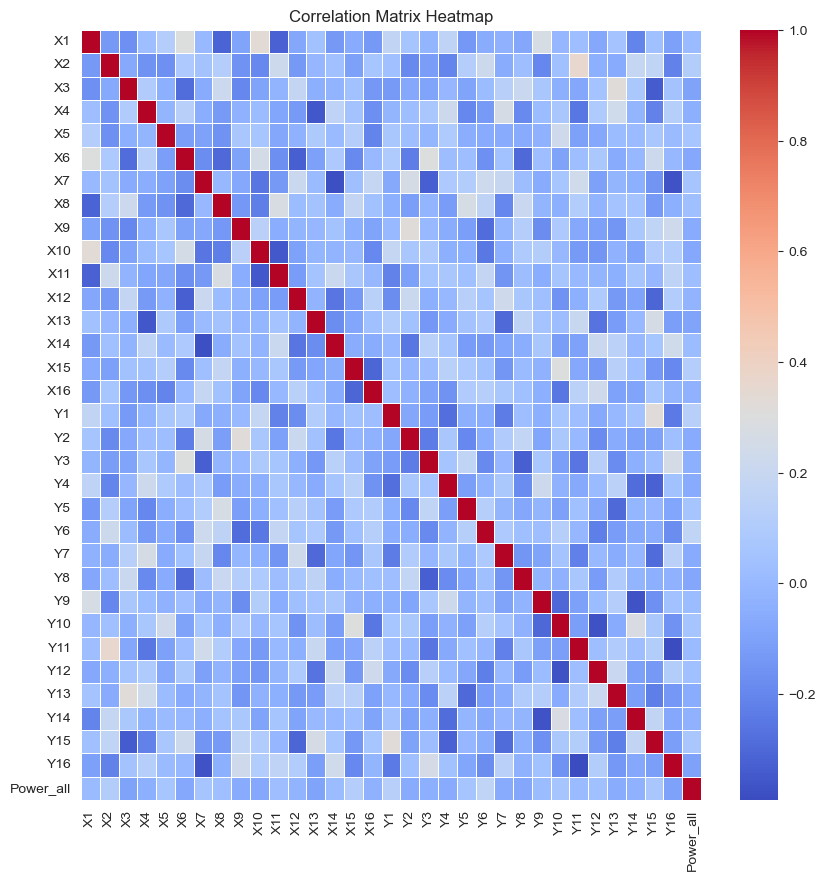

In [31]:
correlation_matrix = sydney_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

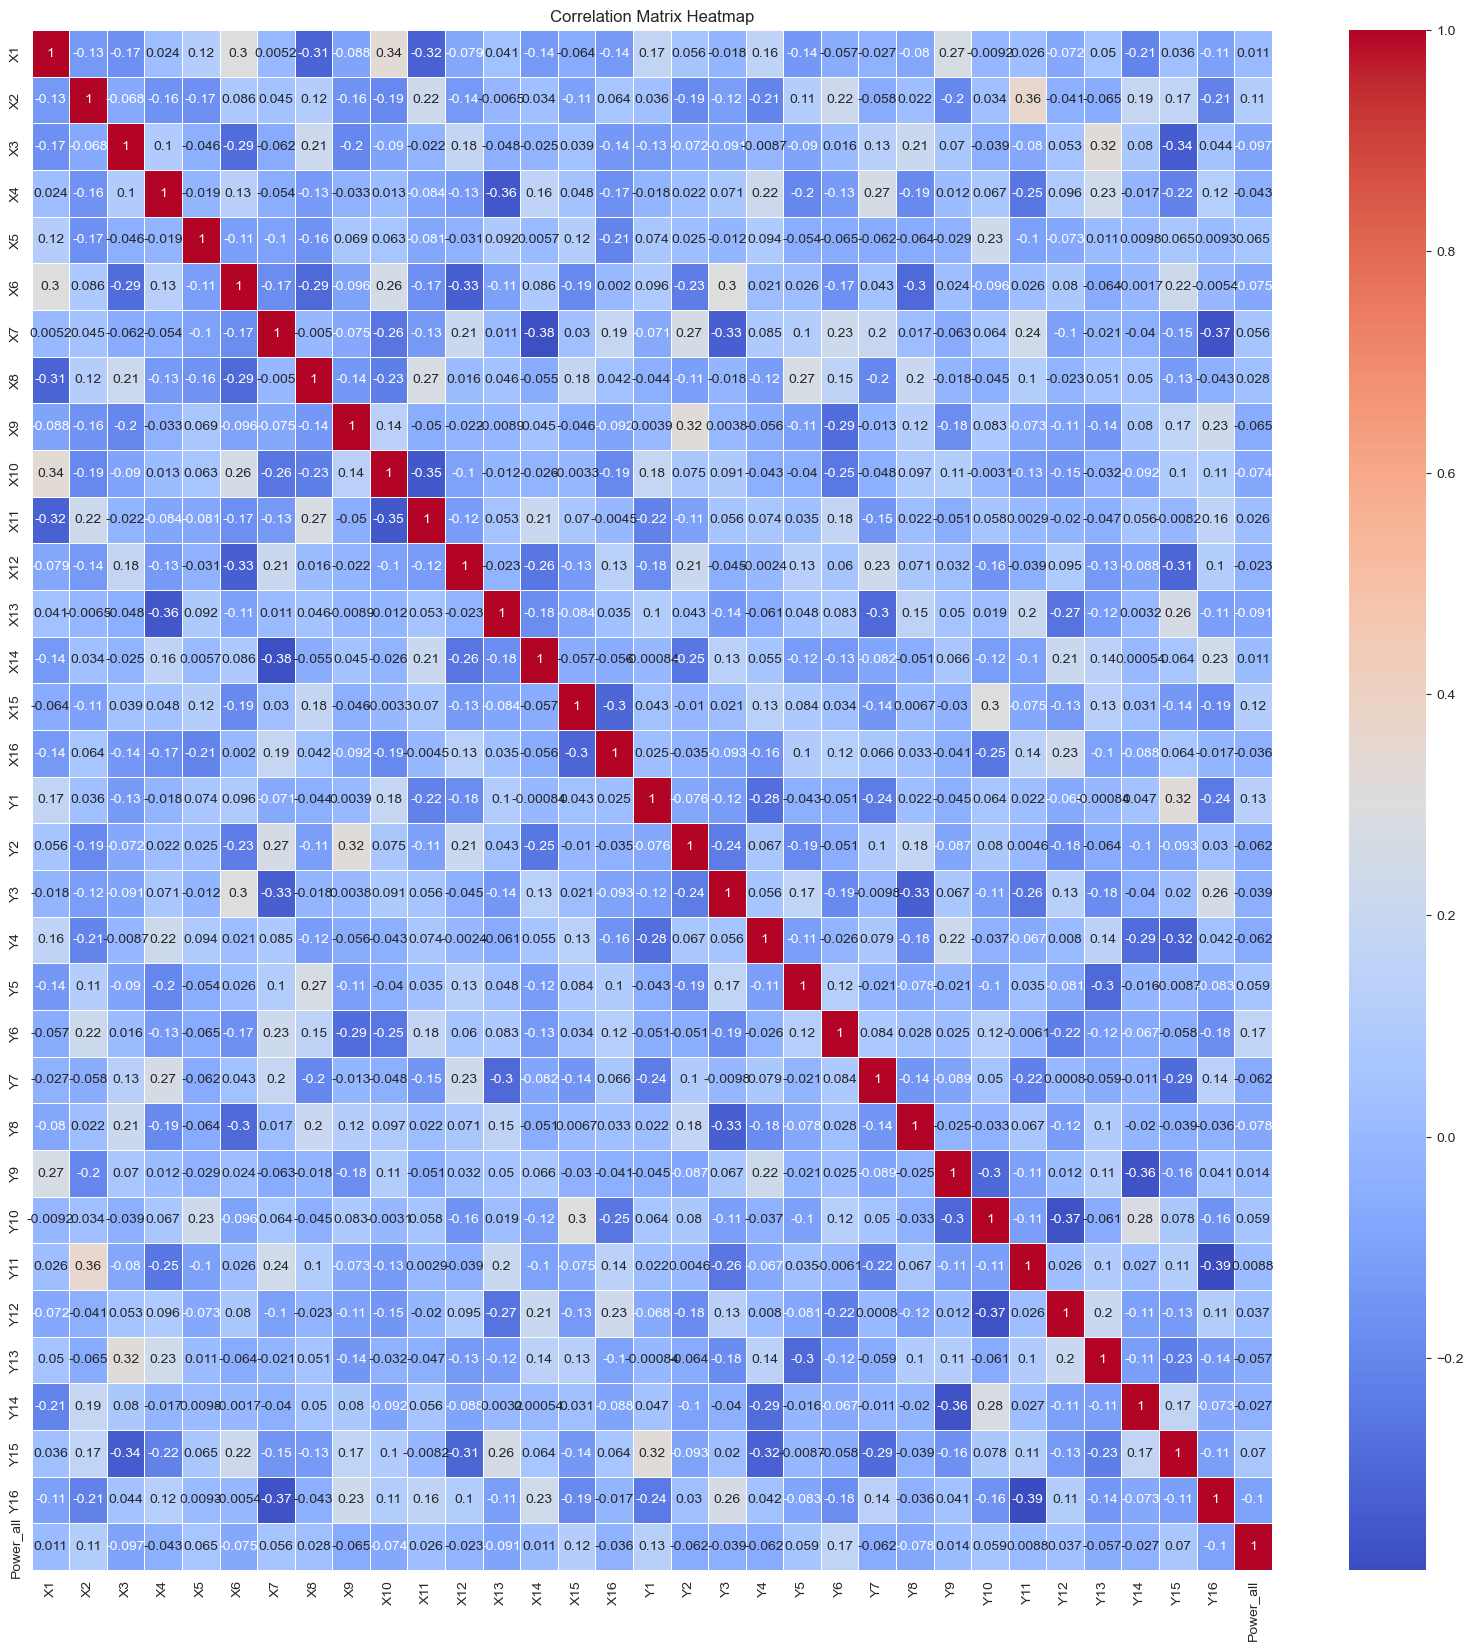

In [32]:
correlation_matrix = sydney_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix,annot = True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

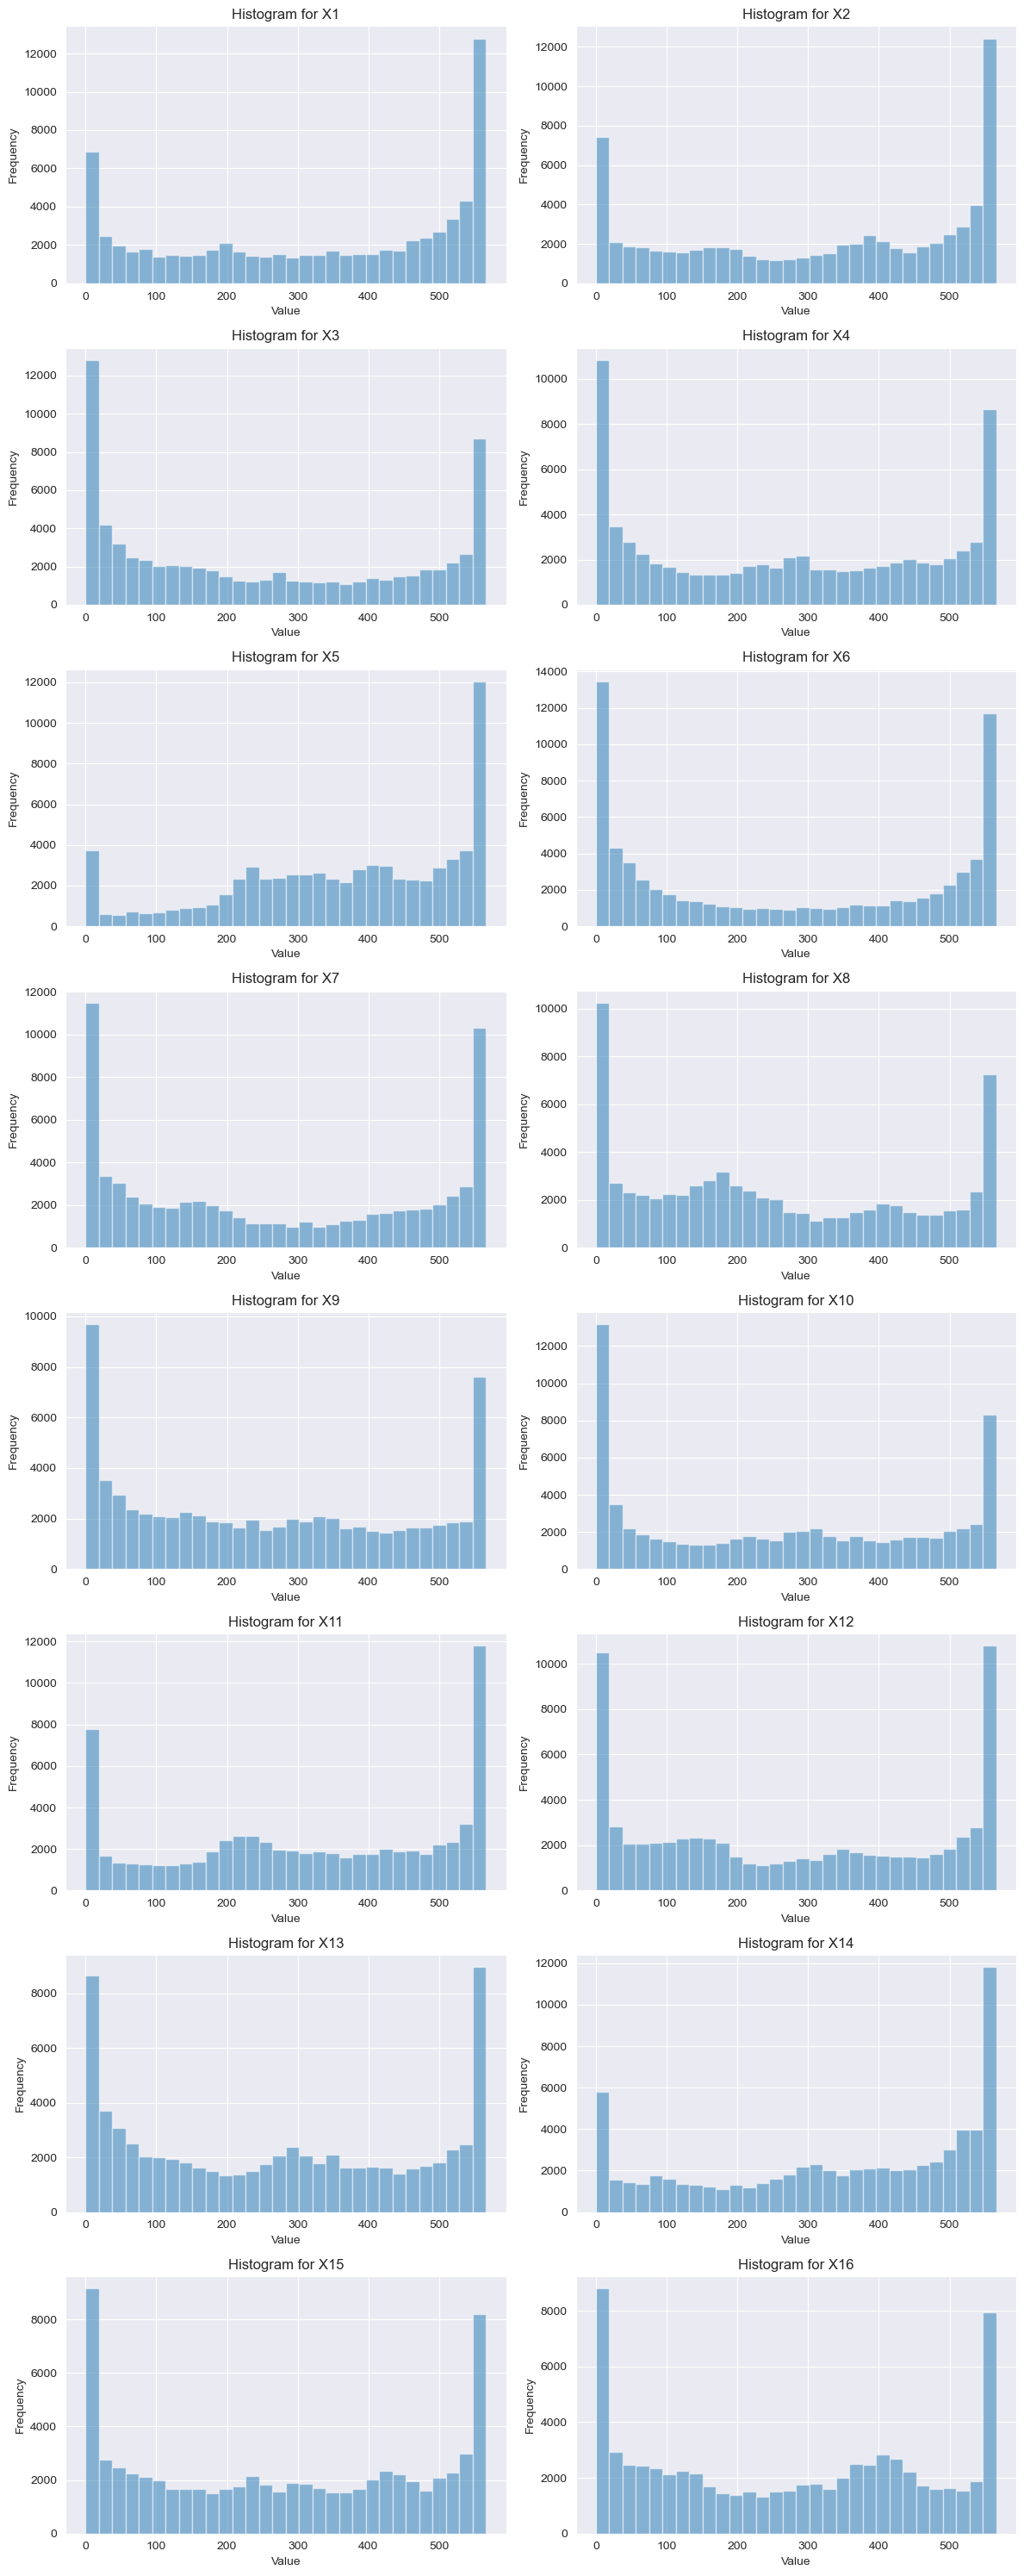

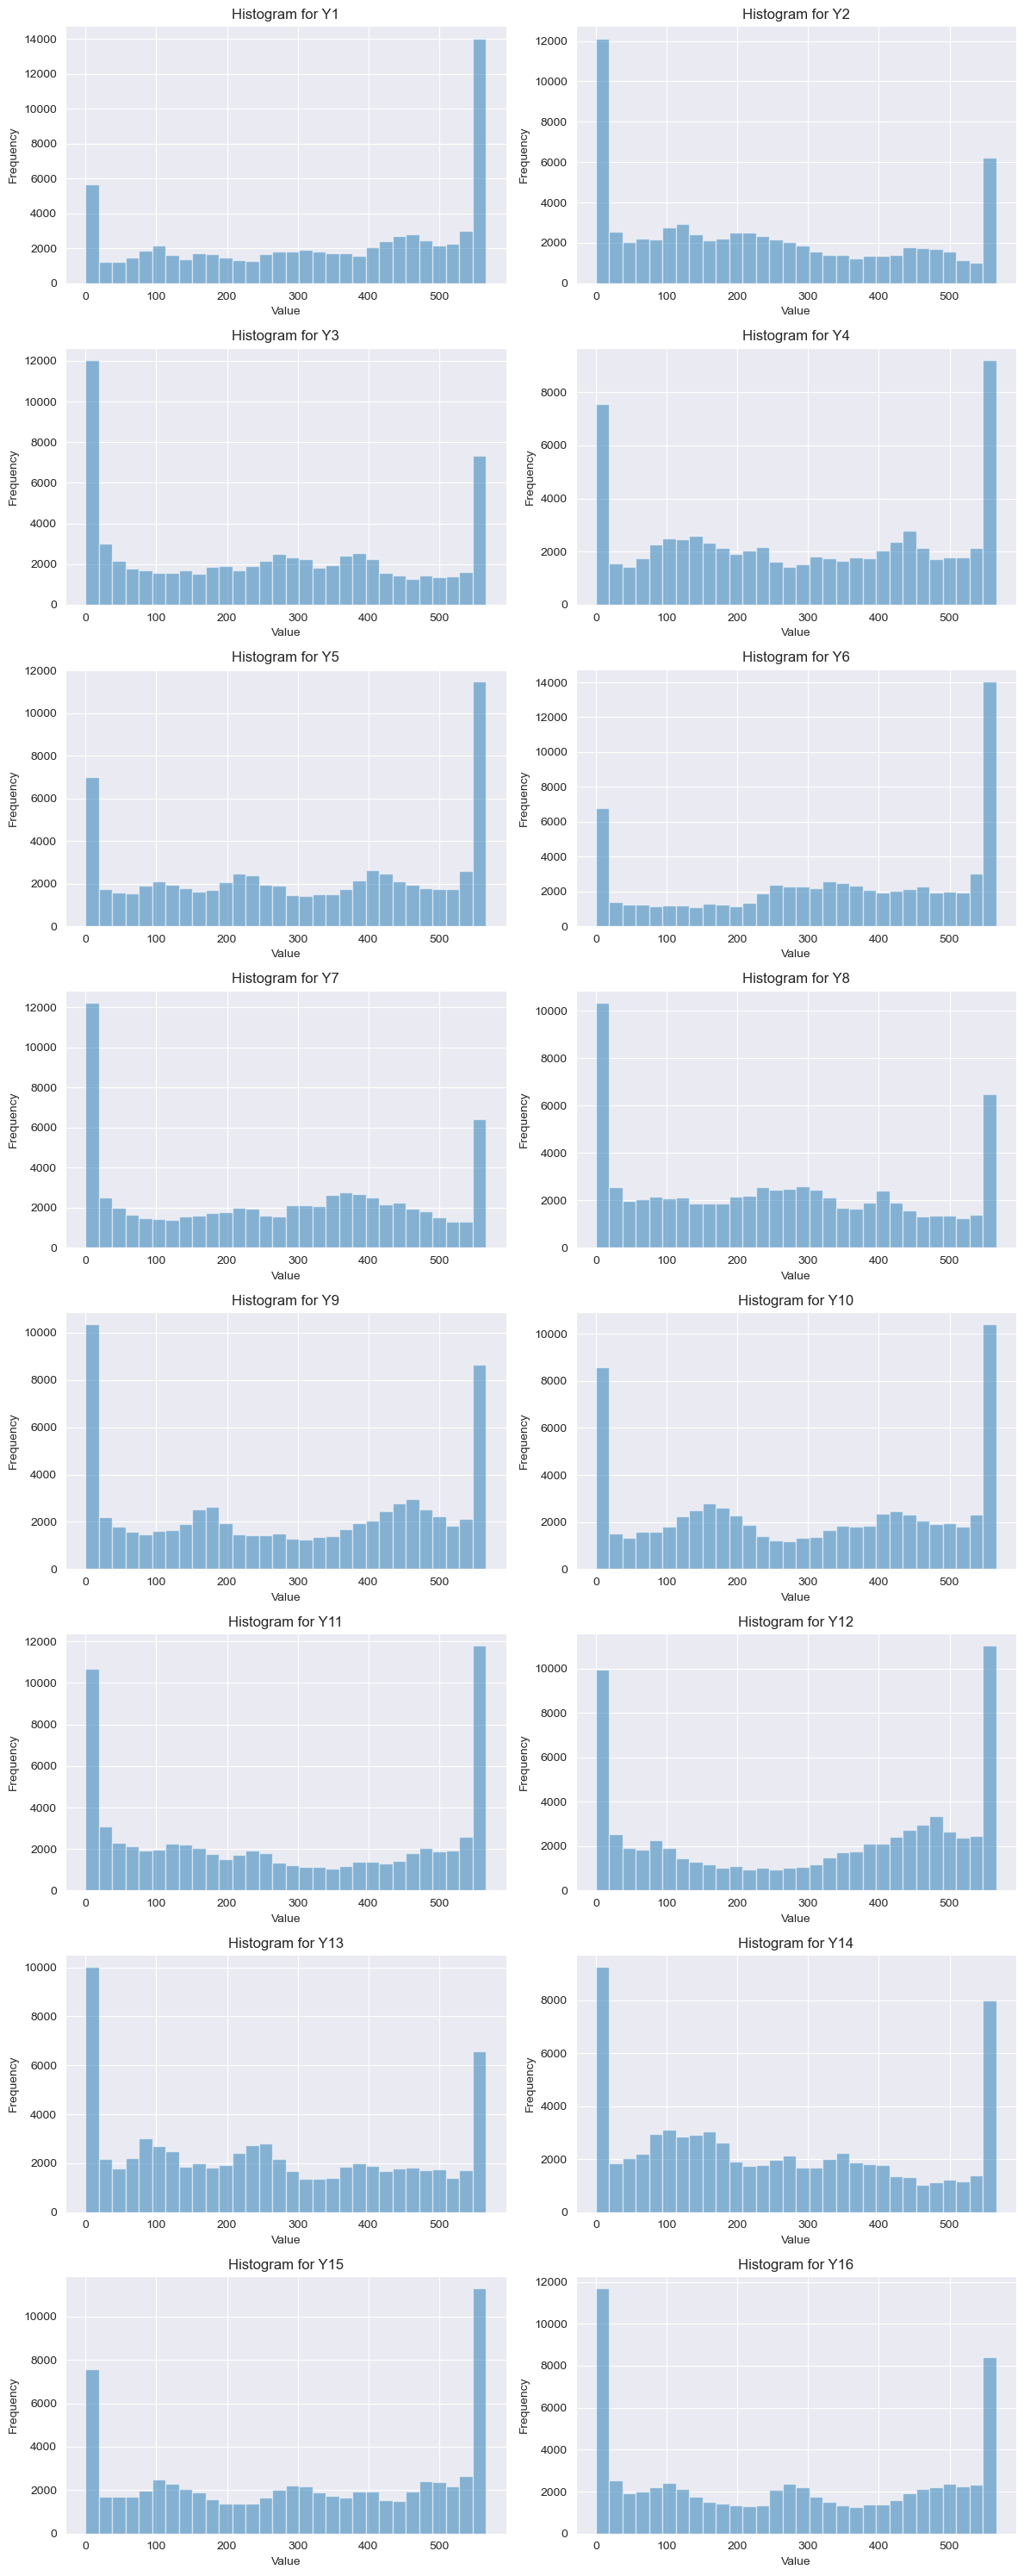

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [33]:
fig, axes = plt.subplots(8, 2, figsize=(12, 30))
for i, ax in enumerate(axes.flatten()):
    sydney_df[f"X{i+1}"].plot(kind='hist', bins=30, alpha=0.5, ax=ax)
    ax.set_title(f'Histogram for X{i+1}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(8, 2, figsize=(12, 30))
for i, ax in enumerate(axes.flatten()):
    sydney_df[f"Y{i+1}"].plot(kind='hist', bins=30, alpha=0.5, ax=ax)
    ax.set_title(f'Histogram for Y{i+1}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


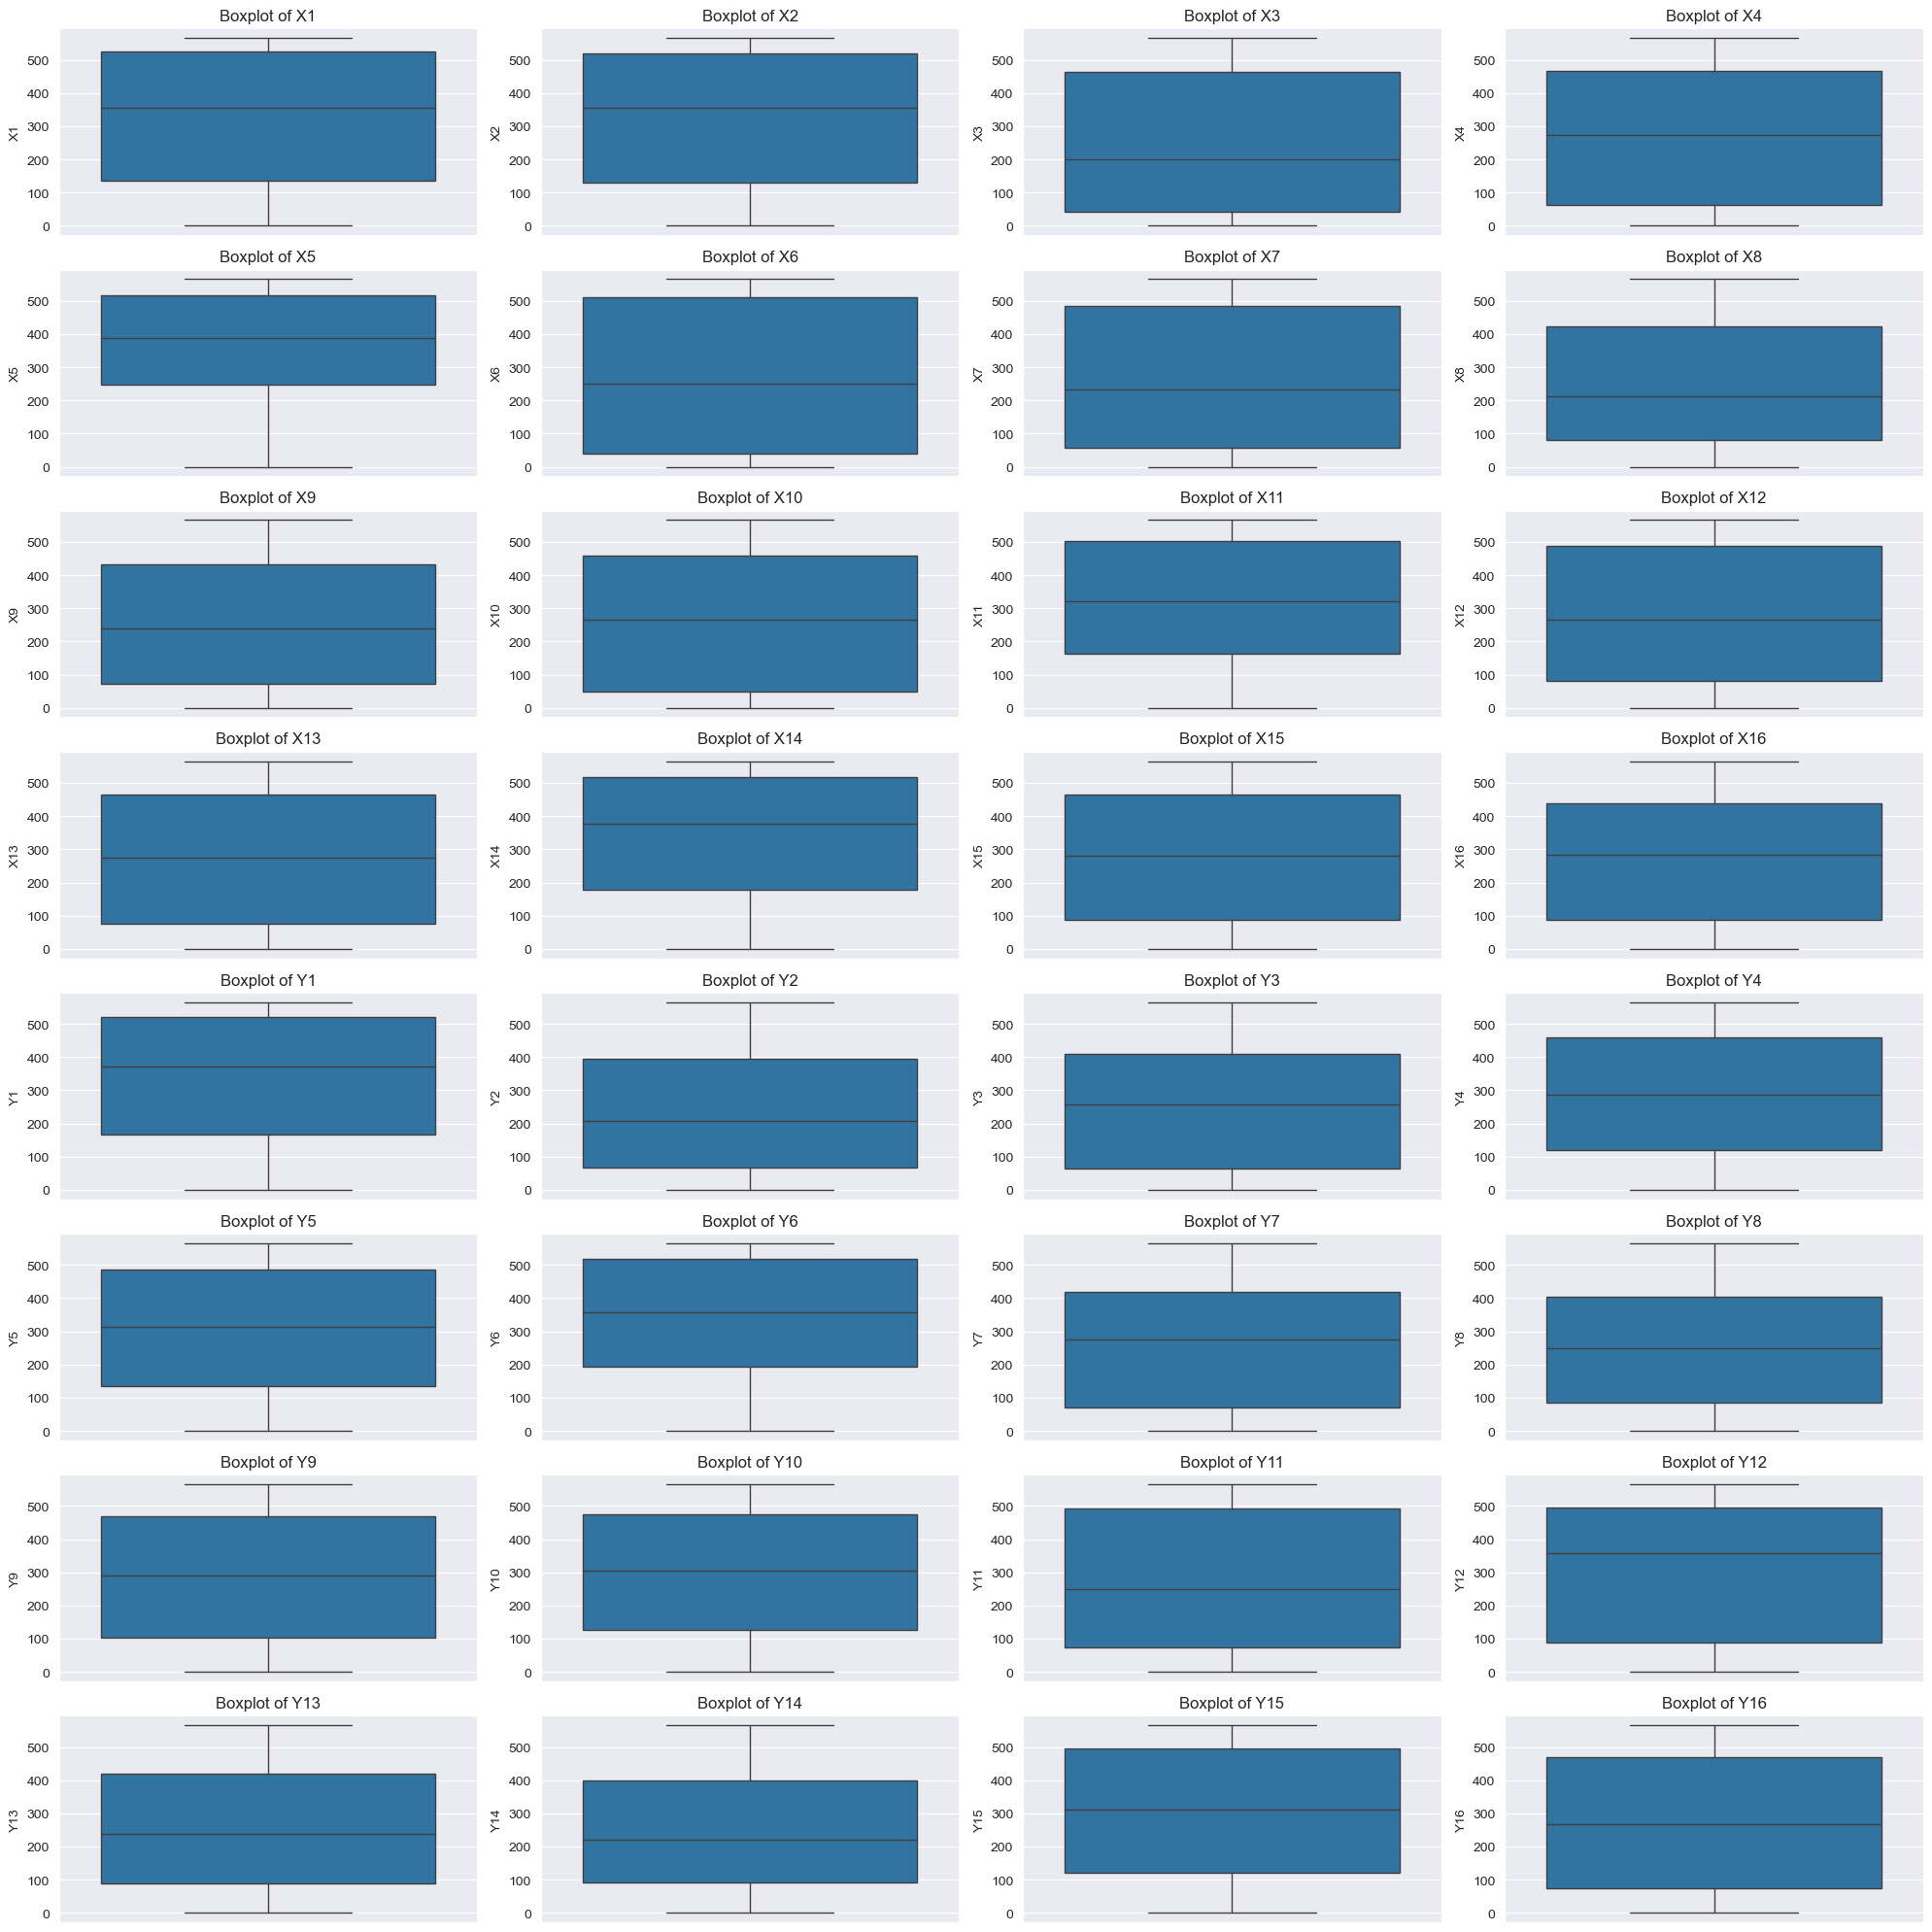

In [34]:
columns_to_plot = [f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]
plt.figure(figsize=(20, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(8, 4, i)
    sns.boxplot(y=sydney_df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()


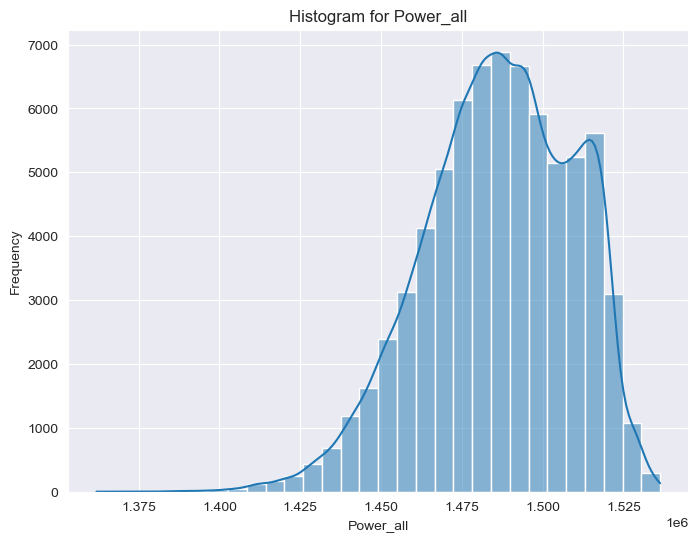

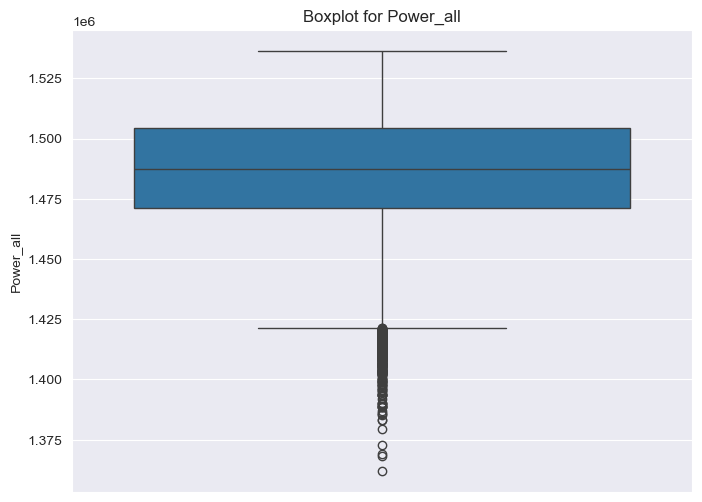

In [35]:
# Histogram dla kolumny Power_all
# sydney_df['Power_all'] = np.log(sydney_df['Power_all'] - sydney_df['Power_all'].min() + 1)

plt.figure(figsize=(8, 6))
sns.histplot(sydney_df['Power_all'], kde=True, bins=30)
plt.title('Histogram for Power_all')
plt.xlabel('Power_all')
plt.ylabel('Frequency')
plt.show()

# Boxplot dla kolumny Power_all
plt.figure(figsize=(8, 6))
sns.boxplot(y=sydney_df['Power_all'])
plt.title('Boxplot for Power_all')
plt.ylabel('Power_all')
plt.show()

In [36]:
upper_limit = sydney_df['Power_all'].mean() + 3 * sydney_df['Power_all'].std()
lower_limit = sydney_df['Power_all'].mean() - 3 * sydney_df['Power_all'].std()


print(upper_limit)
print(lower_limit)

final_df_new = sydney_df.loc[(sydney_df['Power_all'] < upper_limit) & (sydney_df['Power_all'] > lower_limit)]


print("Liczba wierszy po filtracji:", len(final_df_new))
print("Oryginalna liczba wierszy:", len(sydney_df))

sydney_df = final_df_new


1555480.2218922009
1416978.3506115004
Liczba wierszy po filtracji: 71710
Oryginalna liczba wierszy: 71999


(array([ 2.,  8.,  2.,  4.,  8.,  4., 14.,  8.,  2., 12.,  8., 10., 12.,
        10., 20., 16., 20., 12., 42., 20., 50., 32., 42., 46., 44., 44.,
        50., 38., 44., 48., 40., 42., 48., 30., 22., 28., 30., 20.,  8.,
        14., 10., 12.,  8., 14., 22.,  2.,  4., 12.,  2.,  6.,  2.,  4.,
         2.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 33.]),
 array([-0.39144171, -0.37752729, -0.36361287, -0.34969846, -0.33578404,
        -0.32186962, -0.30795521, -0.29404079, -0.28012637, -0.26621195,
        -0.25229754, -0.23838312, -0.2244687 , -0.21055429, -0.19663987,
        -0.18272545, -0.16881104, -0.15489662, -0.1409822 , -0.12706778,
        -0.11315337, -0.09923895, -0.08532453, -0.07141012, -0.0574957 ,
        -0.04358128, -0.02966686, -0.01575245, -0.00183803,  0.012076

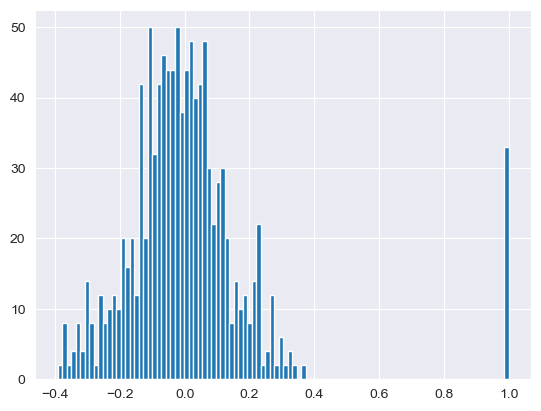

In [37]:
tab=np.array(correlation_matrix).reshape(-1)
plt.hist(tab, bins=100)

In [38]:
# Przygotowanie cech (X) i etykiety (y)
X = sydney_df[[f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]]
y = sydney_df["Power_all"]

# Podział na zestawy train, validation i test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 10% val, 10% test

# Informacja o rozmiarach zbiorów
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 57368 samples
Validation set: 7171 samples
Test set: 7171 samples


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred_lr = lr.predict(X_val)

# Obliczanie MSE, RMSE
mse = mean_squared_error(y_val, y_val_pred_lr)
rmse_lr = np.sqrt(mse)

# Obliczanie współczynnika determinacji R²
r2_lr = lr.score(X_val, y_val)  # R² dla modelu

# Wyświetlanie wyników
print(f"Linear Regression - MSE: {mse}, RMSE: {rmse_lr}, R²: {r2_lr}")

#Linear Regression - MSE: 443448819.88285834, RMSE: 21058.224518768395, R²: 0.1337521660424602


Linear Regression - MSE: 443448819.88285834, RMSE: 21058.224518768395, R²: 0.1337521660424602


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Definicja hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200],      
    'max_depth': [3, 5],             
    'learning_rate': [0.1, 0.2]      
}

# Tworzenie modelu Gradient Boosting
model = GradientBoostingRegressor(random_state=42)

# Grid Search z walidacją krzyżową
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # używamy MSE jako funkcji kosztu
    cv=3,  # liczba podziałów do walidacji krzyżowej
    verbose=1,
    n_jobs=-1  # równoległe przetwarzanie
)

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepszy model i jego hiperparametry
best_model = grid_search.best_estimator_
print("Najlepsze hiperparametry:", grid_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred = best_model.predict(X_val)

# Obliczanie MSE, RMSE i R²
mse = mean_squared_error(y_val, y_val_pred)
rmse_gb = np.sqrt(mse)
r2_gb = r2_score(y_val, y_val_pred)

# Wyświetlanie wyników
print(f"Gradient Boosting - MSE: {mse}, RMSE: {rmse_gb}, R²: {r2_gb}")

# Output
#Najlepsze hiperparametry: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
# Gradient Boosting - MSE: 63501256.665590174, RMSE: 7968.767575076473



# Najlepsze hiperparametry: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
# Gradient Boosting - MSE: 63236190.4806009, RMSE: 7952.118615853318, R²: 0.8764722994504368


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [19]:
# Ograniczenie danych do 20 tysięcy próbek
subset_df = sydney_df.sample(n=10000, random_state=42)

# Przygotowanie cech (X) i celu (y) dla podzbioru danych
X_subset = subset_df[[f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]]
y_subset = subset_df["Power_all"]

# Podział na zbiory train, validation i test
X_train_sub, X_temp_sub, y_train_sub, y_temp_sub = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
X_val_sub, X_test_sub, y_val_sub, y_test_sub = train_test_split(X_temp_sub, y_temp_sub, test_size=0.5, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Definicja przestrzeni hiperparametrów
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Tworzenie modelu Random Forest
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV dla podzbioru danych
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Liczba losowych kombinacji do przetestowania
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Dopasowanie modelu do podzbioru danych treningowych
random_search.fit(X_train_sub, y_train_sub)

# Najlepszy model i jego hiperparametry
best_rf = random_search.best_estimator_
print("Najlepsze hiperparametry:", random_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred_rf = best_rf.predict(X_val_sub)
mse_rf = mean_squared_error(y_val_sub, y_val_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val_sub, y_val_pred_rf)


print(f"Random Forest (Tuned on Subset) - MSE: {mse_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}")

# Najlepsze hiperparametry: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
# Random Forest (Tuned on Subset) - MSE: 126146079.61845961, RMSE: 11231.477178824682, R^2: 0.760743466815291


# 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Najlepsze hiperparametry: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Random Forest (Tuned on Subset) - MSE: 126146079.61845961, RMSE: 11231.477178824682, R^2: 0.760743466815291


In [20]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_squared_error
# import numpy as np
# 
# # Definicja zoptymalizowanej przestrzeni hiperparametrów
# param_dist = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'bootstrap': [True, False]
# }
# 
# # Tworzenie modelu Random Forest
# rf = RandomForestRegressor(random_state=42)
# 
# # RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=10,  # Liczba losowych kombinacji do przetestowania
#     scoring='neg_mean_squared_error',
#     cv=3,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1  # Użycie wszystkich dostępnych rdzeni procesora
# )
# 
# # Dopasowanie modelu do danych treningowych
# random_search.fit(X_train, y_train)
# 
# # Najlepszy model i jego hiperparametry
# best_rf = random_search.best_estimator_
# print("Najlepsze hiperparametry:", random_search.best_params_)
# 
# # Ocena na zbiorze walidacyjnym
# y_val_pred_rf = best_rf.predict(X_val)
# mse_rf = mean_squared_error(y_val, y_val_pred_rf)
# rmse_rf = np.sqrt(mse_rf)
# 
# print(f"Random Forest (Tuned) - MSE: {mse_rf}, RMSE: {rmse_rf}")
# 


In [21]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Definicja ograniczonej przestrzeni hiperparametrów
param_dist = {
    'n_estimators': [100, 200],         # Liczba drzew
    'max_depth': [5, 10],               # Maksymalna głębokość drzewa
    'learning_rate': [0.05, 0.1]        # Szybkość uczenia
}

# Tworzenie modelu XGBoost
model = xgb.XGBRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=8,                       # Liczba losowych kombinacji do przetestowania
    scoring='neg_mean_squared_error',   # Funkcja kosztu
    cv=3,                               # Liczba podziałów do walidacji krzyżowej
    verbose=2,
    random_state=42,
    n_jobs=-1                           # Użycie wszystkich rdzeni procesora
)

# Dopasowanie RandomizedSearchCV
random_search.fit(X_train, y_train)

# Najlepszy model i hiperparametry
best_xgb = random_search.best_estimator_
print("Najlepsze hiperparametry:", random_search.best_params_)

# Ocena najlepszego modelu na zbiorze testowym
y_pred = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost (Tuned) - MSE: {mse}, RMSE: {rmse_xgb}, R²: {r2}")


#Najlepsze hiperparametry: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
#XGBoost (Tuned) - MSE: 39859376.649224006, RMSE: 6313.428280199594, R²: 0.9199470405878842

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Najlepsze hiperparametry: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
XGBoost (Tuned) - MSE: 39859376.649224006, RMSE: 6313.428280199594, R²: 0.9199470405878842


In [22]:
model_performance = {
    "Linear Regression": rmse_lr,
    "Gradient Boosting": rmse_gb,
    "Random Forest": rmse_rf,
    "XGBoost": rmse_xgb,
}

#Wybieramy najlepszy model
best_model_name = min(model_performance, key=model_performance.get)
print(f"Best model based on validation RMSE: {best_model_name}")

Best model based on validation RMSE: XGBoost
